# Predicting Bank Client's Financial Product subscription using Predictive Models.

   - [IBM Data Science](https://github.com/IBMDataScience/NorthwesternAI)

## Table of Content

1. Intrdouction
2. Dataset
3. Data Understanding/Exploration
4. Data Preparation
5. Data Split
6. Building a Model
7. Model Evaluation
    

## Introduction
We will illustrates the Machine Learning classification using the Decision Tree. Decision Tree, is usually a better choice compare to the logistic regression and other techniques for explanatory purpose. We will use the real life data set which is highly imbalance i.e the number of positive sample is much less than the number of negative samples.

We will walk the user to the the following conceptual steps

-  Data Set Description.
-  Exploratory Analysis to understand the data.
-  Use various preprocessing to clean and prepare the data.
-  Use Decision Tree to run the classification.
-  Model Accuracy & Evaluation
-  Conver the Model to PMML

# Data Set <a name="dataset"></a>

We will use the dataset from [UCI repository for Bank Marketing Data Set](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

The source of the dataset is 

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## Data Set Infromation

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 


### Feature Information

###### A. Bank Client Information
| col num| feature name| feature description |
|--------|:-----------:|:--------------------|
|1|  **age** |(numeric)|
|2|  **job** | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')|
|3| **marital**| marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)|
|4| **education** |(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')|
|5| **default**| has credit in default? (categorical: 'no','yes','unknown')|
|6| **balance**| how much credit card balance|
|7| **housing**| has housing loan? (categorical: 'no','yes','unknown')|
|8| **loan**| has personal loan? (categorical: 'no','yes','unknown')|




###### B. Attributes related with the last contact of the current campaign

| col num| feature name| feature description |
|--------|:-----------:|:--------------------|
|9|**contact**| contact communication type (categorical: 'cellular','telephone')| 
|10|**day**| last contact day of month (categorical: '1', '2', '3', ..., '30', '31')|
|11|**month**| last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')|
|12|**duration**|last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.|

###### C. other attributes

| col num| feature name| feature description |
|--------|:-----------:|:--------------------|
|13|**campaign**|number of contacts performed during this campaign and for this client (numeric, includes last contact)|
|14|**pdays**|number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)|
|15|**previous**|number of contacts performed before this campaign and for this client (numeric)|
|16|**poutcome**|outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') |



###### E. Output variable (desired target) 
| col num| feature name| feature description |
|--------|:-----------:|:--------------------|
|17|**y**| has the client subscribed a term deposit? (binary: 'yes','no')|






# Statement of the Classification Problem  <a name="pb_statement"></a>

Now we know the schema of the dataset, lets formalize our model building task.

1) We will build a machine learning model to predict if a client is likely to subscribed to the a financial product i.e term deposit.



### Challenges in building ML model

There are many challenges in the machine learning. A few common examples

   * Non Representative data

   * Insufficient data.

   * Poor quality data.
   
   * Imbalance data set.

   * Irrelevant features.

   * Overfitting the model on data

   * Underfitting of the model on data

   * Whether model will generalize or not

   We will explore many of them as we proceed. 



# Software and Tools (Scikit Learn) 

##### Python Package Dependencies

We will use the [scikit learn package](http://scikit-learn.org/stable/documentation.html) for this task. Next few cells load the libraries needed for this notebook. 


In [ ]:
# load pandas for 
##   1. reading various files into the dataframe
##   2. to performa various data manipulation tasks

import pandas as pd

# load numpy
import numpy as np

In [ ]:
# feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

#for deicison tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# for preprocessing
from sklearn import preprocessing

# for custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

# for creating pipeline
from sklearn.pipeline import Pipeline, FeatureUnion

# for various metrics and reporting
from sklearn import metrics 
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# load matplot lib for various plotting
import matplotlib.pyplot as plt
plt.rc("font", size=14)

# we will use the seaborn for visually appealing plots
import seaborn as sns
sns.set() # set the seaborn stylesheet
#sns.set(style="white")
#sns.set(style="whitegrid")

# Data Exploration <a name="data_exploration"></a>


First step to build predictive model, is to explore data set so that one can get as much insight as possible so that we can do better feature engineering.

##### Data Set loading 

We will use [pandas](https://pandas.pydata.org/) to read data and create dataframe. 
   
   * Pandas support a lot more functionalities for analysis than reading and writing the dataframe. We will use a few of them.


In [4]:
# load csv file
import sys
import types
import pip


# if you are using notebook on your laptop. use following to load
#data_raw_all = pd.read_csv("bank.csv", header=0, sep=";")

data_raw_all = pd.read_csv(body, header=0, sep=";")

In [5]:
# preview 
print("(num_rows, num_cols) :", data_raw_all.shape)
print("attributes :", list(data_raw_all.columns))

print ("\n\n'Bank data set preview'")
data_raw_all.head()

(num_rows, num_cols) : (4521, 17)
attributes : ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


'Bank data set preview'


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
# schema
print("Data set schema")
data_raw_all.dtypes

Data set schema


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## Data Exploration using Seaborn and Matplotlib

Lets start with data exploration. As we explore, we hope to 

* Look at big picture.
* Get insights into the data and problem. 
* If possible, redefine the problem statement based.


Usually, for exploratory analysis, one samples input dataset. However, our dataset is small and hence
we will put the sample fraction to be 1.0. For the bigger dataset, one may want to change fraction accordingly.


In [7]:
# clean data
## cleaning routines
def clean_data(df):
    """
     Clean the data for the exploratory analysis
     
     arguements:
     df -- pandas dataframe.
     
    """
    # drop the missing data row
    data = df.dropna()
    
    # first convert the day type to object - Since day is not of int64 type but a categorical type
    data['day'] = df.astype('object')

   
    return data

# 
data_ex = clean_data(data_raw_all) #.sample(frac=1.0)


### Explore output


##### Positive and Negative Class Distribution.

We know the output i.e client response 'y' can be 'yes' or 'no'. Lets see it's relative frequencies.
Since we are interested in predicting when client is going to purchase a term deposit, out positive sample is 'yes' and
negative samples is 'no'


/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


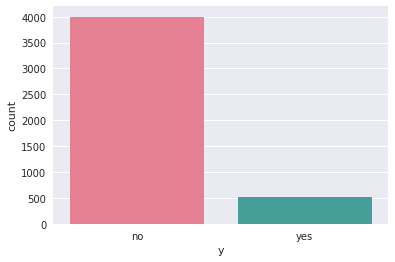

In [8]:
sns.countplot(x='y', data=data_ex, palette='husl')
plt.show()


### Note
We can see that we have class imbalances between positive and negative classes (positive samples are around 10% and negative samples are around 90%). The class imbalance is very common in the real dataset. We will see that this imabalance causes problem in our model performance. However there are a lot of ways to mitigate it.



#####  Check if there is the class skew wrt other numerical columns

Lets see for the numeric column, on average if there is a pattern in the two classes.


In [9]:
# mean of the numeric features and how it effects output

data_ex.groupby('y').mean()

,age,balance,duration,campaign,pdays,previous
y,,,,,,
no,40.998000,1403.211750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,552.742802,2.266795,68.639155,1.090211



We note that:

   *  age, balance, day, compaign are balanced between 'yes' and 'no' classes and hence probably not the best predictors
   *  duration feature as explained in the dataset shouldn't be used for prediction and we will not analyse this feature
   *  pdays feature indicates that usually the conversion happens if the client are contacted not frequently
   *  previous feature indicates that more the number of times client are contacted more likely he will be a positive sample.
    
    

###  Explore the inputs

We can get many insights into the data set by exploring the inputs i.e features.


###### Distribution and corelation of the numeric columns

Lets plot the distribution of the features and their cross co-relation to get the information about reduntant features.


In [ ]:
# create the scatter plot.
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

num_cols_with_y = num_cols + ['y']

g = sns.pairplot(data_ex[num_cols_with_y], 
                 hue = 'y',  # yes is green and 
                 diag_kind='hist',  # histogram plot for diag
                 dropna=True,
                 markers=[',', ','], # markers for yes and no                 
                 palette=sns.color_palette(['red', 'green']), # # yes is green and no is red
                 plot_kws={
                     's':3 # size of the point
                 },
                 
                )
g = g.map_lower(sns.kdeplot, cmap="Blues_d")


plt.show()

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'marker', 'color', 'label'
  s)
/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/statsmodels/nonparametric/_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/matplotlib/contour.py:1533: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.m

We observe the following insights

* All the columns of interests (i.e diagonal plot) has the predictive power (as none of them are uniform). 

* The class imbalance is high (i.e green color 'yes' is far less than red colored 'no' in the diag plot)

* Non diagonal lower matrix plot contains contour plot for pairwise features.

* Non diagonal upper matrix plot contains the corelation between pairwise corelation. For example cell (1 rst row, 3rd column) shows that there is some corelation between 'age' and 'days' feature. So to get the better feel, we will plot the heat map co-relation matrix also.


In [ ]:
# find the corelation between inputs
corr = data_ex[num_cols].corr()

# plot heatmap
sns.heatmap(corr, 
            xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            cmap=sns.light_palette("navy"),
           )
plt.show()

We note that:

* pdays and previous features are correlated heavily and we should use one of them



We did various exploratory analysis to get more insights into the dataset.


## Create a Test and Train Set.

Now it is time to split aside the train and test dataset. Why is it that we makes this decision at this stage?
Since if we don't do it and train our model on the whole dataset and then test it on the part of the dataset, we are testing on the subset of data which was used for training and hence we will never know whether our model generalizes well or not.





To split the dataset into training and testing, we will use scikit learn's utility [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). It works also with pandas dataframe and we don't have to do any conversion from pandas to numpy data type.

For Model Training, we will sub-split train set and only in the end, we will use test set for generalization test.


In [ ]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

# Encoding the variable
data_ex_label = data_ex.apply(lambda x: d[x.name].fit_transform(x))

In [ ]:
X= data_ex_label.loc [:, data_ex_label.columns !='y']
y= data_ex_label.loc [:, data_ex_label.columns =='y']
    
#70% training dataset
seed=10
test_size=0.3
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=test_size,random_state=seed)
    
print('Size of Training Dataset: ',X_train.shape,y_train.shape)
print('Size of Testing Dataset: ',X_test.shape,y_test.shape)
print('Test data propotion', test_size*100, '%')
print("Sample of the training dataset \n")
X.head()

In [ ]:
#Training the decision tree classifier. 
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)

In [ ]:
y_pred =  clf.predict(X_test)

In [ ]:
y_test = y_test['y'].values.tolist()

### Metrics for Model Performance <a name="metrics_perf"></a>

To come up with the best model, we should evaluate model performance for comparison amongs models.There are many ways to evaluate the model performance for classification.

1) Accuracy Score

2) Confusion Matrix

3) ROC curve

4) Precision Recall Curve

We will discuss and create utilities for the above in next few sections




###### Accuracy Score
Accuracy is just the ratio of the number of correctly classified samples to the total number of samples.
This is very simple score but it in case of the class imbalance, the score can be misleading. Hence, we 
will not use this.


In [ ]:
# evaluate predictions
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

#####  Confusion Matrix

Apart from the accuracy, the following performance measures for the models are also very helpful to measure it's performance on test dataset.

* The number of samples correctly predicted as negative i.e True Negative (TN).

* The number of samples correctly predicted as positive i.e True Positive (TP). These are also used in accuracy calculation.

* The number of samples which were positive but were predicted as negative i.e False Negative (FN).

* The number of samples which were negative but were predicted as positive i.e False Positive (FP).

[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) gives above mentioned metrics of performance and is widely used for classification task.

We have created a utility to visualize confusion matrix based on the dataset.


In [ ]:
results = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ') 
print(results)

In [ ]:
print ('Report : ')
print (classification_report(y_test, y_pred))

### Advantages and Disadvantages of Trees
*Following are the advantages of decision trees:*
- Easy to use and understand. 
- Can handle both categorical and numerical data. 
- Resistant to outliers, hence require little data preprocessing. 
- New features can be easily added. 
- Can be used to build larger classifiers by using ensemble methods.

*Following are the disadvantages of decision trees:* 
- Prone to overfitting. 
- Require some kind of measurement as to how well they are doing. 
- Need to be careful with parameter tuning. 
- Can create biased learned trees if some classes dominate.



### Strategy For Better Classifier for the Imbalance Data <a name="ml_clf_strategy"></a>

Can we do better than the current performance? The answer is yes and typically in these cases, we follow the following 
techniques.

1) Use the weighted class i.e give higher weight for the class 1 i.e 'yes'

2) OverSampling of the Minority class and Undersampling of the minority class

3) Use the SMOTE (synthetic Minority class oversampling)
   
   
   